In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = fetch_openml("mnist_784")
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [22]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [3]:
mnist.data.shape

(70000, 784)

**So we have 70k handwritten data that consists 28 by 28 pixel each. (28*28=784)**

In [4]:
mnist.target.shape

(70000,)

**This gives me the shape of the labels**

In [5]:
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


**It's a label corresponding to every single shape**

In [11]:
print(mnist.data[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

**Here I have printed the first shape of my array, here total 784 numbers or 28 by 28 pixel corresponds to a certain digit. Let's see what digit it is.**

In [10]:
print(mnist.target[0])

5


**The digit is 5!**

# **Processing and Visualizing our Digits**

**Plotting first five numbers of my array**

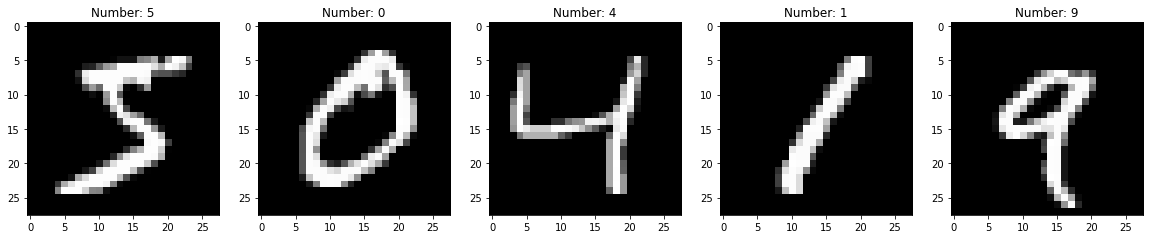

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])): 
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (28,28)), cmap="gray")
  plt.title("Number: %s" % label)

# **Applying Logistic Regression on our data** 

In [24]:
x_train,x_test,y_train,y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(56000, 784) (14000, 784) (56000,) (14000,)


In [16]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(x_train,y_train)
predictions = mdl.predict(x_test)
score = mdl.score(x_test, y_test) 
print(score)

0.9206428571428571


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Hence we can say that our linear regression model has correctly labelled the inputs given with 92% accuracy.**

# **Visualizing our Predictions**

In [18]:
mdl.predict([x_test[0]])[0]

'1'

Prediction: 1


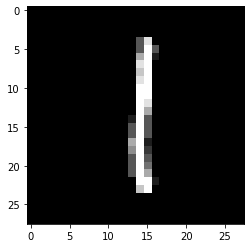

In [21]:
index = 0
plt.imshow(np.reshape(x_test[index], (28,28)), cmap='gray')
print("Prediction: " + mdl.predict([x_test[index]])[0])

**The model has predicted the input and visualized it accurately.**